In [1]:
import kagglehub

path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [7]:
titanic = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# I. Univariate Non-Graphical EDA

## 1. Statistics

In [12]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 2. Value Counts & Relative Freqs (Categorical)

In [16]:
for col in ['Sex', 'Pclass', 'Embarked', 'Survived']:
    vc = titanic[col].value_counts(dropna=False)

    print(f"Column: {col}")
    print(f"Value Counts: {vc}")
    print()
    print(f"Relative Freq: {(vc / len(titanic)).round(3)}")
    print('-' * 50)

Column: Sex
Value Counts: Sex
male      577
female    314
Name: count, dtype: int64

Relative Freq: Sex
male      0.648
female    0.352
Name: count, dtype: float64
--------------------------------------------------
Column: Pclass
Value Counts: Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Relative Freq: Pclass
3    0.551
1    0.242
2    0.207
Name: count, dtype: float64
--------------------------------------------------
Column: Embarked
Value Counts: Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Relative Freq: Embarked
S      0.723
C      0.189
Q      0.086
NaN    0.002
Name: count, dtype: float64
--------------------------------------------------
Column: Survived
Value Counts: Survived
0    549
1    342
Name: count, dtype: int64

Relative Freq: Survived
0    0.616
1    0.384
Name: count, dtype: float64
--------------------------------------------------


## 3. Missing Value Report

In [18]:
missing = titanic.isna().sum().sort_values(ascending=False)
missing

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [21]:
pct_missing = (missing / len(titanic)).round(3)
pct_missing

Cabin          0.771
Age            0.199
Embarked       0.002
PassengerId    0.000
Name           0.000
Pclass         0.000
Survived       0.000
Sex            0.000
Parch          0.000
SibSp          0.000
Fare           0.000
Ticket         0.000
dtype: float64

In [22]:
pd.concat([missing, pct_missing], axis=1, keys=['missing_count', 'missing_frac'])

,missing_count,missing_frac
Cabin,687,0.771
Age,177,0.199
Embarked,2,0.002
PassengerId,0,0.000
Name,0,0.000
Pclass,0,0.000
Survived,0,0.000
Sex,0,0.000
Parch,0,0.000
SibSp,0,0.000


## 4. Skewness & Kurtosis

In [11]:
num_cols = titanic.select_dtypes(include=[np.number]).columns.tolist()
titanic[num_cols].agg(['mean','median','std','skew','kurt'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
median,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
skew,0.000000,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
kurt,-1.200000,-1.775005,-1.280015,0.178274,17.880420,9.778125,33.398141


# II. Univariate Graphical EDA

## 1. Histogram and KDE

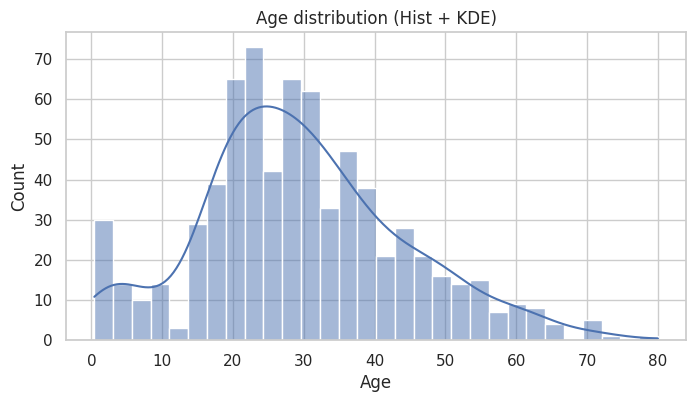

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title("Age distribution (Hist + KDE)")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 2. Violin Plot

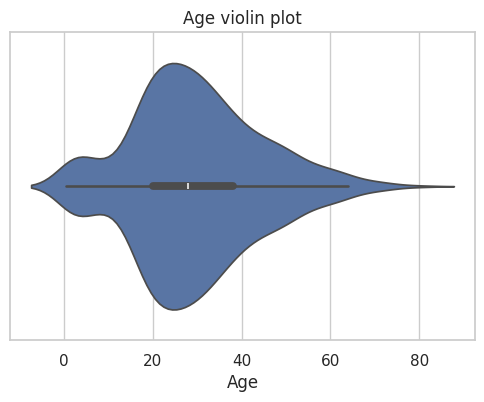

In [18]:
plt.figure(figsize=(6,4))
sns.violinplot(x=titanic['Age'].dropna())
plt.title('Age violin plot')
plt.show()

## 3. Pie Chart

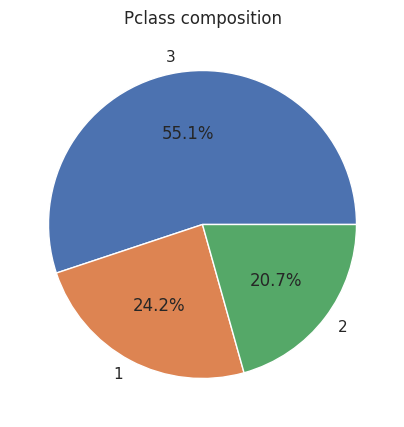

In [19]:
titanic['Pclass'].value_counts().plot.pie(autopct='%.1f%%', figsize=(5,5))
plt.title('Pclass composition')
plt.ylabel('')
plt.show()

# III. Multivariate Non-Graphical EDA

## 1. Pivot Table

In [20]:
# survival rates by Pclass and Sex
titanic.groupby(['Pclass','Sex'])['Survived'].agg(['count','mean']).reset_index().sort_values(['Pclass','Sex'])
# pivot
titanic.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc=['mean','count'])

mean            count     
Sex       female      male female male
Pclass                                
1       0.968085  0.368852     94  122
2       0.921053  0.157407     76  108
3       0.500000  0.135447    144  347

In [29]:
titanic[['PassengerId', 'Survived', 'Pclass', 'Age']].corr()

,PassengerId,Survived,Pclass,Age
PassengerId,1.000000,-0.005007,-0.035144,0.036847
Survived,-0.005007,1.000000,-0.338481,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.369226
Age,0.036847,-0.077221,-0.369226,1.000000


## 3. Covariance

In [27]:
cov_3vars = titanic[['Age', 'Fare', 'SibSp']].dropna().cov()

cov_3vars

,Age,Fare,SibSp
Age,211.019125,73.849030,-4.163334
Fare,73.849030,2800.413100,6.806212
SibSp,-4.163334,6.806212,0.864497


## * ANOVA

In [23]:
from scipy.stats import f_oneway
groups = [group['Fare'].dropna().values for name, group in titanic.groupby('Pclass')]
fstat, p = f_oneway(*groups)
print("ANOVA Fare ~ Pclass: F=%.3f, p=%.3g" % (fstat, p))

ANOVA Fare ~ Pclass: F=242.344, p=1.03e-84


# IV. Multivariate Graphical EDA

## 1. Heatmap

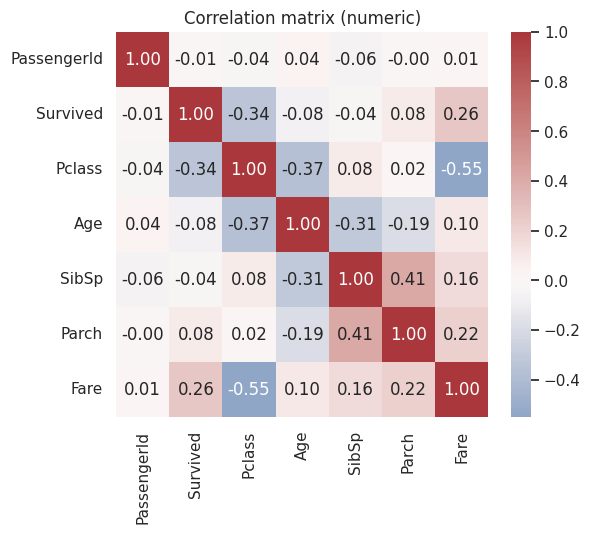

In [31]:
corr = titanic.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation matrix (numeric)')
plt.show()

## 2. Stacker Bar Plot

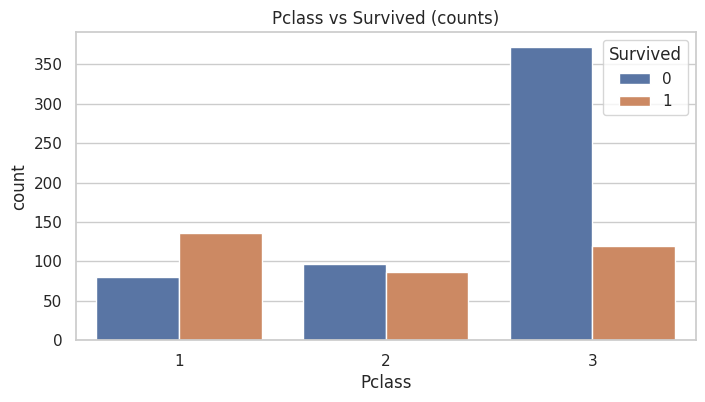

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Pclass vs Survived (counts)')
plt.show()